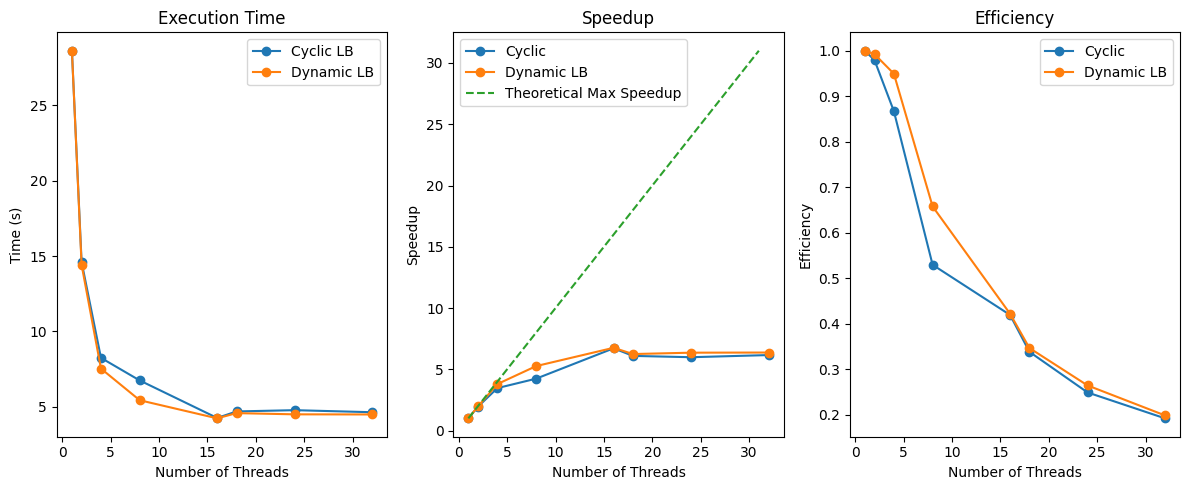

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df_cyclic = pd.read_csv("../output_data/cyclic_parameter_sweep.csv")
df_dynamic = pd.read_csv("../output_data/dynamic_parameter_sweep.csv")
df_gpu = pd.read_csv("../output_data/gpu_parameter_sweep.csv")

# Filter relevant data
df_cycl_rel = df_cyclic[np.logical_and(df_cyclic["Resolution"] == "2880x1920", df_cyclic["Max Iterations"] == 2000)]
df_dyn_rel = df_dynamic[np.logical_and(df_dynamic["Resolution"] == "2880x1920", df_dynamic["Max Iterations"] == 2000)]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Execution time vs threads
axes[0].plot(df_cycl_rel["Threads"], df_cycl_rel["Time (s)"], marker='o', linestyle='-', label="Cyclic LB")
axes[0].plot(df_dyn_rel["Threads"], df_dyn_rel["Time (s)"], marker='o', linestyle='-', label="Dynamic LB")
axes[0].set_xlabel("Number of Threads")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Execution Time")
axes[0].legend()

# Plot 2: Speedup vs threads
axes[1].plot(df_cycl_rel["Threads"], df_cycl_rel["Time (s)"].iloc[0] / df_cycl_rel["Time (s)"], marker='o', linestyle='-', label="Cyclic")
axes[1].plot(df_dyn_rel["Threads"], df_dyn_rel["Time (s)"].iloc[0] / df_dyn_rel["Time (s)"], marker='o', linestyle='-', label="Dynamic LB")
axes[1].plot(np.arange(1, 32), np.arange(1, 32), linestyle='--', label="Theoretical Max Speedup")
axes[1].set_xlabel("Number of Threads")
axes[1].set_ylabel("Speedup")
axes[1].set_title("Speedup")
axes[1].legend()

# Plot 2: Efficiency vs threads
axes[2].plot(df_cycl_rel["Threads"], df_cycl_rel["Time (s)"].iloc[0] / (df_cycl_rel["Time (s)"] * df_cycl_rel["Threads"]), marker='o', linestyle='-', label="Cyclic")
axes[2].plot(df_dyn_rel["Threads"], df_dyn_rel["Time (s)"].iloc[0] / (df_dyn_rel["Time (s)"] * df_cycl_rel["Threads"]), marker='o', linestyle='-', label="Dynamic LB")
axes[2].set_xlabel("Number of Threads")
axes[2].set_ylabel("Efficiency")
axes[2].set_title("Efficiency")
axes[2].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

/tmp/ipykernel_5756/2289562193.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycl_rel["Pixels"] = df_cycl_rel["Resolution"].apply(resolution_to_pixels)
/tmp/ipykernel_5756/2289562193.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dyn_rel["Pixels"] = df_dyn_rel["Resolution"].apply(resolution_to_pixels)
/tmp/ipykernel_5756/2289562193.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

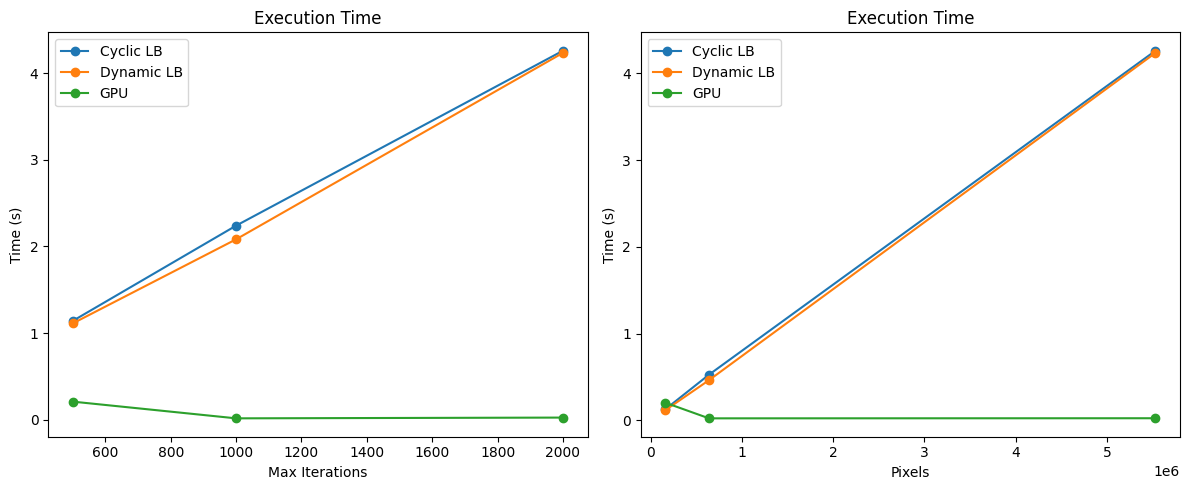

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Filter relevant data
df_cycl_rel = df_cyclic[np.logical_and(df_cyclic["Resolution"] == "2880x1920", df_cyclic["Threads"] == 16)]
df_dyn_rel = df_dynamic[np.logical_and(df_dynamic["Resolution"] == "2880x1920", df_dynamic["Threads"] == 16)]
df_gpu_rel = df_gpu[df_gpu["Resolution"] == "2880x1920"]

# Plot 1: Execution time vs Max Iterations
axes[0].plot(df_cycl_rel["Max Iterations"], df_cycl_rel["Time (s)"], marker='o', linestyle='-', label="Cyclic LB")
axes[0].plot(df_dyn_rel["Max Iterations"], df_dyn_rel["Time (s)"], marker='o', linestyle='-', label="Dynamic LB")
axes[0].plot(df_gpu_rel["Max Iterations"], df_gpu_rel["Time (s)"], marker='o', linestyle='-', label="GPU")
axes[0].set_xlabel("Max Iterations")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Execution Time")
axes[0].legend()

# Convert resolution strings to number of pixels
def resolution_to_pixels(res_str):
    width, height = map(int, res_str.split('x'))
    return width * height

# Filter relevant data
df_cycl_rel = df_cyclic[np.logical_and(df_cyclic["Max Iterations"] == 2000, df_cyclic["Threads"] == 16)]
df_dyn_rel = df_dynamic[np.logical_and(df_dynamic["Max Iterations"] == 2000, df_dynamic["Threads"] == 16)]
df_gpu_rel = df_gpu[df_gpu["Max Iterations"] == 2000]

# Convert resolution to pixel count
df_cycl_rel["Pixels"] = df_cycl_rel["Resolution"].apply(resolution_to_pixels)
df_dyn_rel["Pixels"] = df_dyn_rel["Resolution"].apply(resolution_to_pixels)
df_gpu_rel["Pixels"] = df_gpu_rel["Resolution"].apply(resolution_to_pixels)

# Plot 2: Execution time vs Number of Pixels
axes[1].plot(df_cycl_rel["Pixels"], df_cycl_rel["Time (s)"], marker='o', linestyle='-', label="Cyclic LB", )
axes[1].plot(df_dyn_rel["Pixels"], df_dyn_rel["Time (s)"], marker='o', linestyle='-', label="Dynamic LB")
axes[1].plot(df_gpu_rel["Pixels"], df_gpu_rel["Time (s)"], marker='o', linestyle='-', label="GPU")
axes[1].set_xlabel("Pixels")
axes[1].set_ylabel("Time (s)")
axes[1].set_title("Execution Time")
axes[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()